# Graphing Airline Ontime Data

This notebook shows how to create a time-series graph from airline ontime data, which can be downloaded from the [US Bureau of Transportation Statistics](https://www.transtats.bts.gov/tables.asp?DB_ID=120).  See https://github.com/Altinity/altinity-datasets for tools to help with loading. 

First import SQLAlchemy and activate the %sql function.  This just needs to be done once. 

In [1]:
from sqlalchemy import create_engine
%load_ext sql

Run a query using %%sql.  This needs to go in a separate cell. 

In [2]:
%%sql clickhouse://default:@localhost/airline
SELECT toYear(FlightDate) t, 
    sum(Cancelled)/count(*) cancelled, 
    sum(DepDel15)/count(*) delayed
FROM airline.ontime GROUP BY t ORDER BY t

Done.


t,cancelled,delayed
1987,0.015005801074227831,0.15847681018671683
1988,0.009642843961357115,0.13082207633230913
1989,0.014711774974212489,0.16047806077917956
1990,0.009952393266188481,0.1329419891468106
1991,0.008569163420771431,0.11384922960256455
1992,0.010375956593639985,0.11081983528787506
1993,0.011802581243944139,0.118570334568517
1994,0.012884050495284986,0.12803356262335794
1995,0.01725126632234837,0.1554094981919066
1996,0.024016518737073715,0.18197890389412671


Turn the result into a nice dataframe and prove it has some data in it. 

In [3]:
result = _
df = result.DataFrame()
df.tail()

,t,cancelled,delayed
27,2014,0.021819,0.205397
28,2015,0.015446,0.181739
29,2016,0.011724,0.169740
30,2017,0.013999,0.194787
31,2018,0.010669,0.177533


Time to make a quick graph using matplotlib.  I'm not the greatest at this but once you have a data frame everything is possible. 

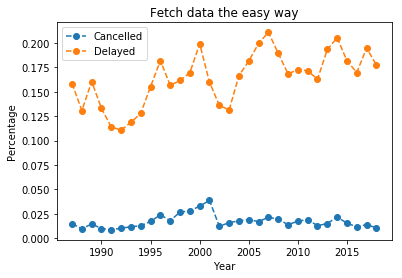

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot('t', 'cancelled', 
         data=df, linestyle='--', 
         marker='o', label='Cancelled')
plt.plot('t', 'delayed', 
         data=df, linestyle='--', 
         marker='o', label='Delayed')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='upper left')
plt.title('Fetch data the easy way')
plt.show()

The %sql magic function is great but we can also do the same thing using the clickhouse-driver client library and direct API calls. 

In [5]:
import pandas
from clickhouse_driver import Client

client = Client('localhost', database='airline')
result, columns = client.execute(
    'SELECT toYear(FlightDate) t,'
    'sum(Cancelled)/count(*) cancelled,'
    'sum(DepDel15)/count(*) delayed '
    'FROM airline.ontime GROUP BY t ORDER BY t', 
    with_column_types=True)

df2 = pandas.DataFrame(result, columns=[tuple[0] for tuple in columns])
df2.tail()

,t,cancelled,delayed
27,2014,0.021819,0.205397
28,2015,0.015446,0.181739
29,2016,0.011724,0.169740
30,2017,0.013999,0.194787
31,2018,0.010669,0.177533


The graph looks just the same, so we change the title to tell them apart. 

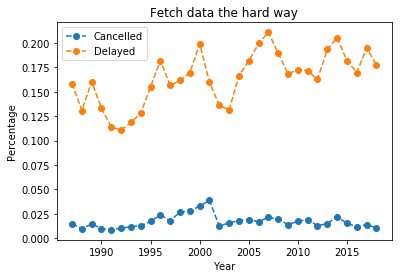

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot('t', 'cancelled', data=df2, 
         linestyle='--', marker='o', label='Cancelled')
plt.plot('t', 'delayed', data=df2, 
         linestyle='--', marker='o', label='Delayed')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='upper left')
plt.title('Fetch data the hard way')
plt.show()

That's all folks!